<a href="https://colab.research.google.com/github/ceyan2251/zabotin/blob/main/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
figsize(40,20)

url = 'https://drive.google.com/u/0/uc?id=1-TzMGAKLjS9RrYXSBWCAD0zAk-gd1pab&export=download'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Все значения признаков ненулевые, Как и в прошлый раз проверим на наличие дубликатов:

In [ ]:
data[data.duplicated(keep='first')]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Имеем 240 дубликатов.Уберем их, так как они будут мешать в процессе обучения

In [ ]:
print('Строк до: ', len(data))
data.drop_duplicates(keep='first', inplace=True)
print('Строк после: ',len(data))

Строк до:  1599
Строк после:  1359


Разделим данные для обучения и проверки

In [ ]:
X_columns = data.columns[:-1]
y_column = data.columns[-1]
X = data[X_columns]
y = data[y_column]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

Почистим от коррелирующих признаков

In [ ]:
X_train.drop(['citric acid', 'density', 'pH', 'total sulfur dioxide'], axis = 'columns', inplace=True)
X_test.drop(['citric acid', 'density', 'pH', 'total sulfur dioxide'], axis = 'columns', inplace=True)
X_columns = X_train.columns[:-1]

# Распределение признаков

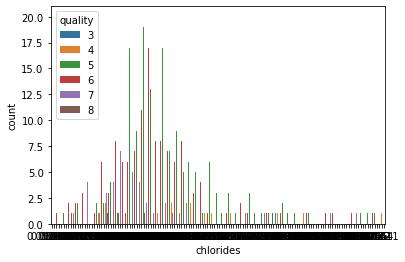

In [ ]:
sns.countplot(X_train['chlorides'], hue=y_train)

В целом подобная картина будет просматриваться на всех признаках датасета. Рассмотрим  распределение признаков относительно друг друга:

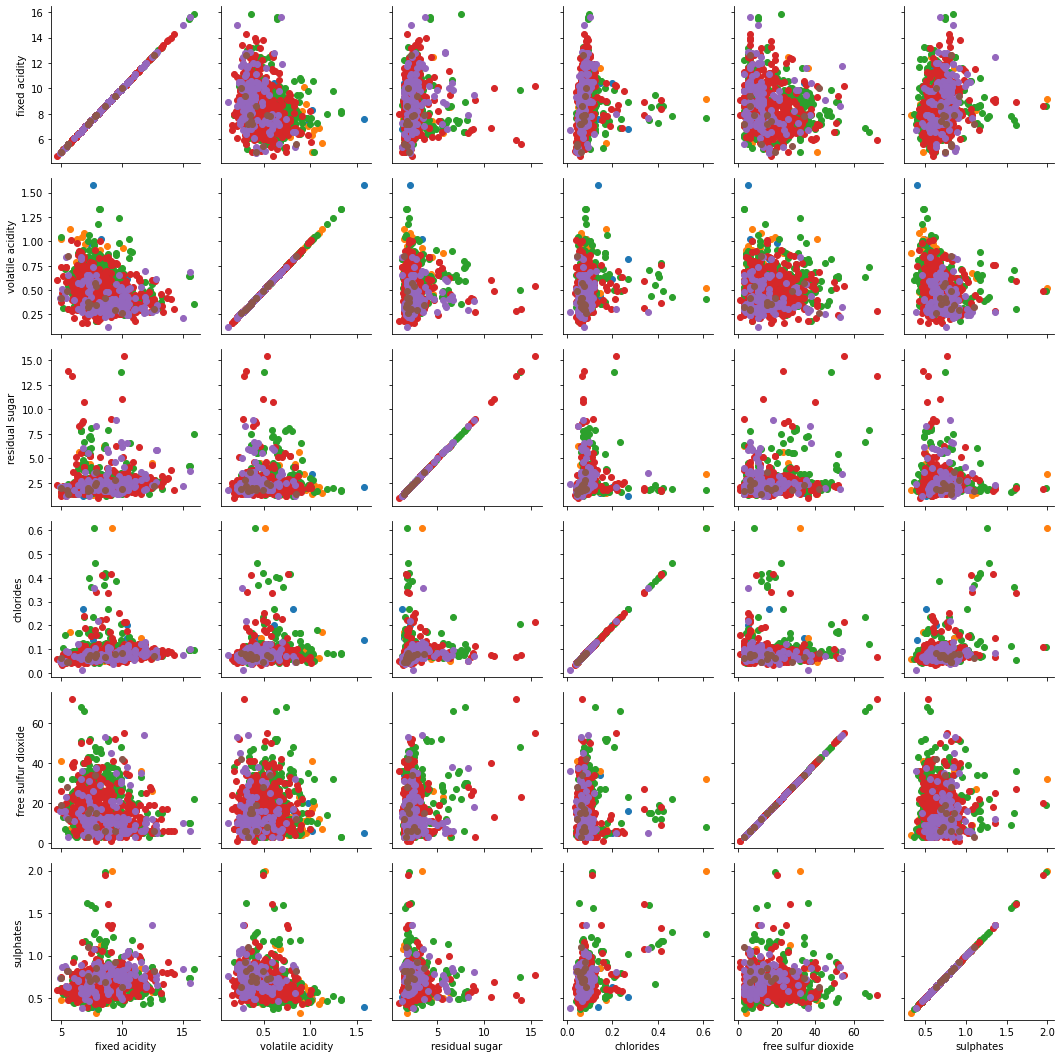

In [ ]:
data_for_pairgrid = X_train[X_columns]
data_for_pairgrid[y_column] = y_train

sns.PairGrid(data_for_pairgrid, hue=y_column).map(plt.scatter)

Рассмотрим возможные выбросы:

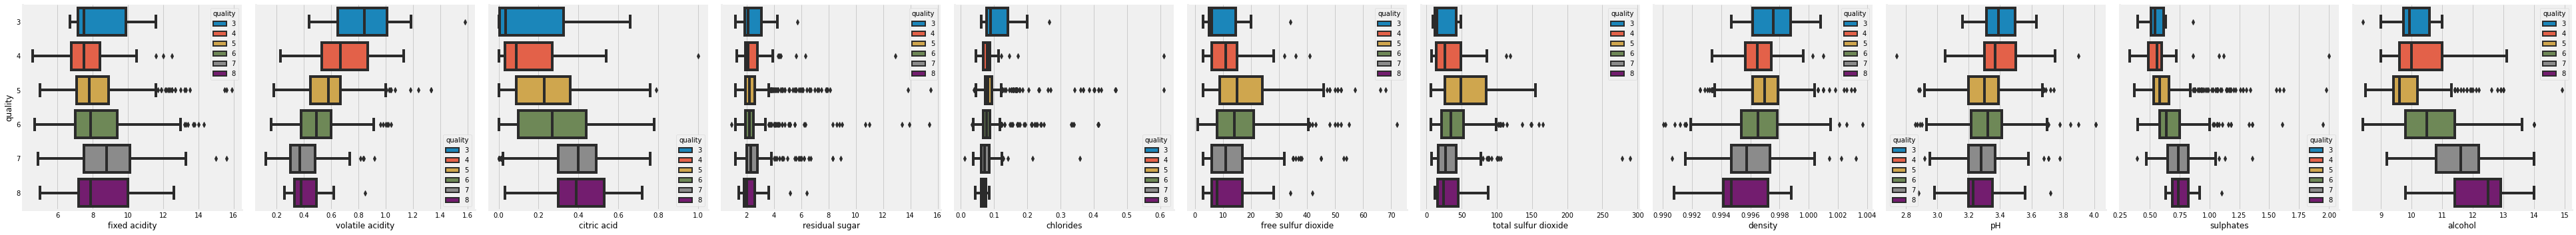

In [ ]:
g = sns.PairGrid(data, x_vars=X_columns, y_vars=[y_column],
            height=5.)

for irow, icol in np.ndindex(g.axes.shape):
    ax = g.axes[irow][icol]
    sns.boxplot(x=X_columns[icol], y=[y_column][irow], hue=[y_column][irow],
                dodge=False,
                data=data,
                orient="h",
                ax=ax)


Плотности распределения величин

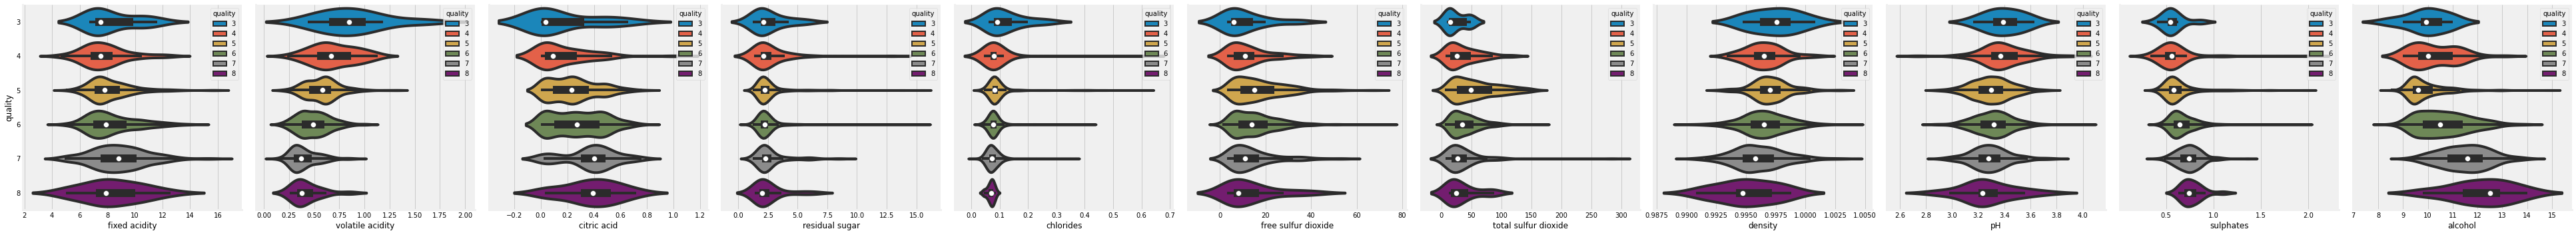

In [ ]:
g = sns.PairGrid(data, x_vars=X_columns, y_vars=[y_column],
            height=5.)

for irow, icol in np.ndindex(g.axes.shape):
    ax = g.axes[irow][icol]
    sns.violinplot(x=X_columns[icol], y=[y_column][irow], hue=[y_column][irow],
                dodge=False,
                data=data,
                orient="h",
                ax=ax)


# Нормализация

Качество алгоритма до нормализации:  0.43823529411764706
Качество алгоритма после нормализации:  0.4441176470588235


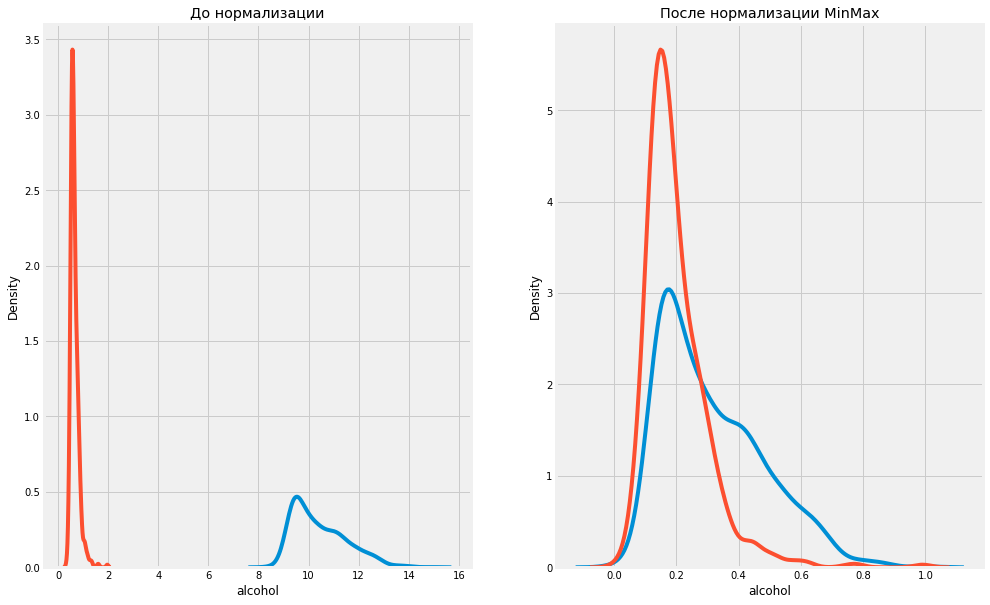

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации: ", KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train).score(X_test,y_test))
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

print("Качество алгоритма после нормализации: ", KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled,y_train).score(X_test_scaled,y_test))

figsize(15,10)
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.set_title('До нормализации')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['sulphates'], ax=ax1)

ax2.set_title('После нормализации MinMax')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['sulphates'], ax=ax2)

plt.show()


# Стратификация

Распределение классов в тренировочной выборке

Text(0.5, 1.0, 'Quality distribution')

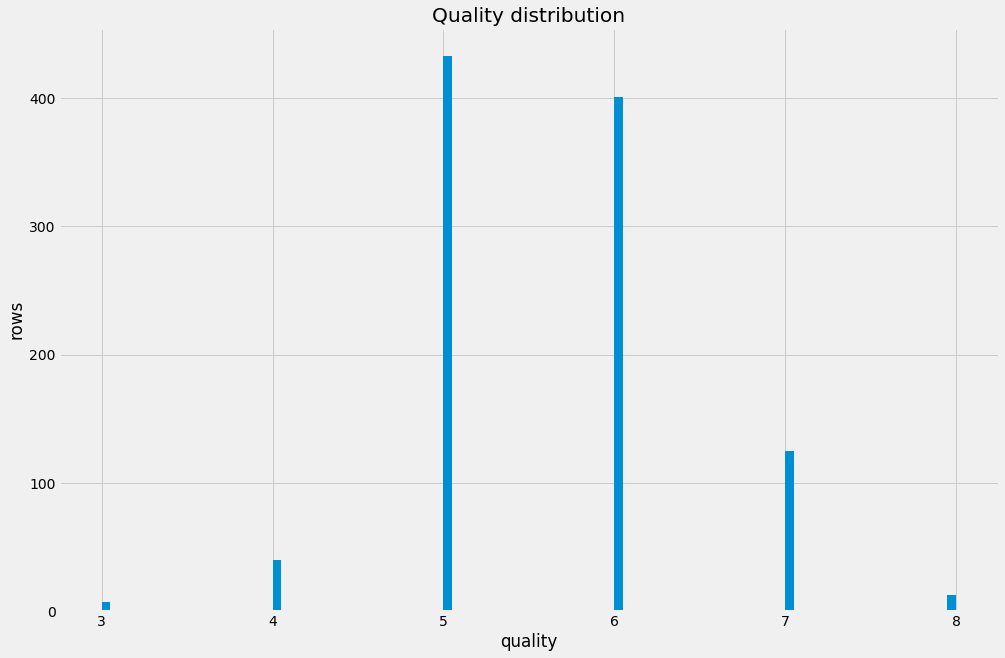

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=100)
plt.xlabel('quality')
plt.ylabel('rows')
plt.title('Quality distribution')

Видим сильный дисбаланс классов. Применим оверсэмплинг методом SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm)

Text(0.5, 1.0, 'Quality distribution after oversampling')

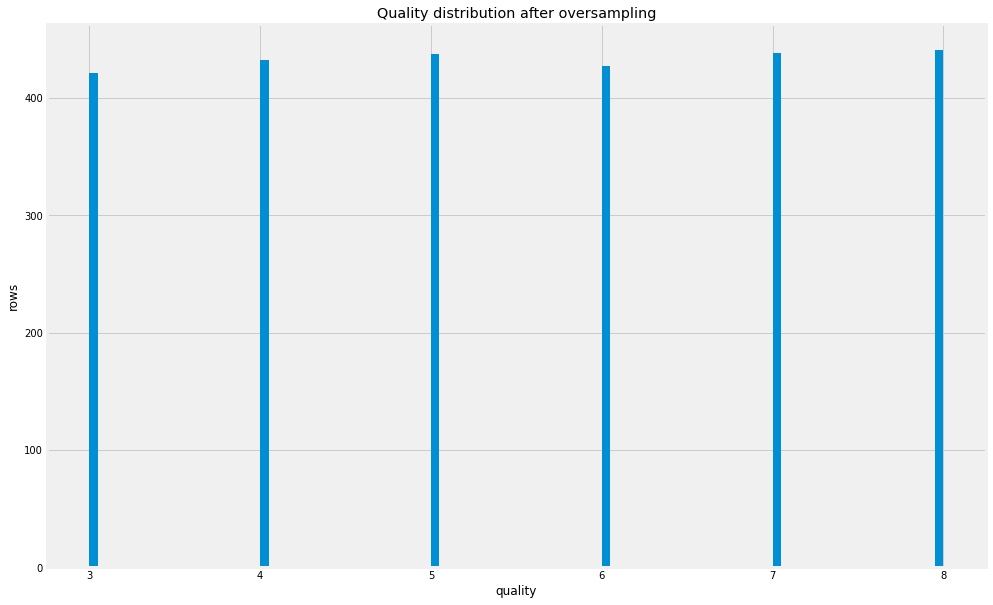

In [ ]:
plt.hist(y_train_sm, bins=100)
plt.xlabel('quality')
plt.ylabel('rows')
plt.title('Quality distribution after oversampling')

# Подбор алгоритма

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
  print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.4676470588235294
SGDClassifier 0.5735294117647058
SVC 0.5411764705882353
GaussianNB 0.5411764705882353
KNeighborsClassifier 0.5088235294117647


Аналогичные действия после оверсэмплинга

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
  print(clf.__class__.__name__, clf.fit(X_train_sm, y_train_sm).score(X_test_sm, y_test_sm))

DecisionTreeClassifier 0.7355658198614319
SGDClassifier 0.2840646651270208
SVC 0.39838337182448036
GaussianNB 0.46882217090069284
KNeighborsClassifier 0.6616628175519631


Наложим на это нормализацию

In [ ]:
X_train_sm_scaled = pd.DataFrame(scaler.fit_transform(X_train_sm),columns=X_columns)
X_test_sm_scaled = pd.DataFrame(scaler.fit_transform(X_test_sm),columns=X_columns)

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
  print(clf.__class__.__name__, clf.fit(X_train_sm_scaled, y_train_sm).score(X_test_sm_scaled, y_test_sm))

DecisionTreeClassifier 0.5923787528868361
SGDClassifier 0.49653579676674364
SVC 0.6801385681293303
GaussianNB 0.4653579676674365
KNeighborsClassifier 0.7528868360277137


Наиболее результативной оказалось классификация методом ближайших соседей

# Метрики качества

In [ ]:
В связи с тем, что целевая переменная не бинарная (мультикласс), напишем функции для обработки метрик по классам

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

def roc_auc_score_multiclass(actual_class, pred_class, average = "micro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
  return roc_auc_dict

def precision_recall_curve_multiclass(actual_class, pred_class):
  precision_dict = dict()
  recall_dict = dict()
  unique_class = set(actual_class)
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    precision, recall, _ = precision_recall_curve(new_actual_class, new_pred_class)

    precision_dict[per_class] = precision
    recall_dict[per_class] = recall
  return precision_dict, recall_dict

def auc_multiclass(recall_dict, precision_dict):
  auc_dict = dict()
  for key, value in recall_dict.items():
    auc_dict[key] = auc(value, precision_dict[key])
  return auc_dict

In [ ]:
clf = KNeighborsClassifier()
predict = clf.fit(X_train_sm_scaled, y_train_sm).predict(X_test_sm_scaled)

print('Accuracy',accuracy_score(y_test_sm, predict))
print('Precision',precision_score(y_test_sm, predict,average='micro'))
print('Recall',recall_score(y_test_sm, predict, average='micro'))
print('ROC AUC',roc_auc_score_multiclass(y_test_sm, predict, average='micro'))
print('F1',f1_score(y_test_sm, predict,average='micro'))
print('F0.5',fbeta_score(y_test_sm, predict, 0.5,average='micro'))
print('F2',fbeta_score(y_test_sm, predict, 0.5,average='micro'))

pr, rec = precision_recall_curve_multiclass(y_test_sm, predict)
print('PRC AUC',auc_multiclass(rec, pr))

Accuracy 0.7528868360277137
Precision 0.7528868360277137
Recall 0.7528868360277137
ROC AUC {3: 0.9901408450704225, 4: 0.9391266918551819, 5: 0.7508461235733963, 6: 0.6138454376163873, 7: 0.8354823706371904, 8: 0.983058017727639}
F1 0.7528868360277138
F0.5 0.7528868360277137
F2 0.7528868360277137
PRC AUC {3: 0.9588235294117646, 4: 0.8473030010180603, 5: 0.6130577274919076, 6: 0.44962583221243724, 7: 0.7629307263679361, 8: 0.9465044959373176}
